In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
df = pd.read_csv('/content/housing.csv')

df.drop(['B'],axis = 1,inplace = True)

df.rename(columns = {'MEDV' : 'PRED','CHAS' : 'RIVER'},inplace = True)

df.head()

,CRIM,ZN,INDUS,RIVER,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRED
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2


- **CRIM** per capita crime rate by town
- **ZN** proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS** proportion of non-retail business acres per town
- **RIVER** (= 1 if tract bounds river; 0 otherwise)
- **RM** average number of rooms per dwelling
- **AGE** proportion of owner-occupied units built prior to 1940
- **DIS** weighted distances to five Boston employment centres
- **RAD** index of accessibility to radial highways
- **TAX** full-value property-tax rate per 10,000 USD
- **PTRATIO** pupil-teacher ratio by town
- **LSTAT** lower status of the population
- **PRED** Median value of owner-occupied homes in $1000's

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     310 non-null    float64
 1   ZN       310 non-null    float64
 2   INDUS    310 non-null    float64
 3   RIVER    310 non-null    int64  
 4   NOX      310 non-null    float64
 5   RM       310 non-null    float64
 6   AGE      310 non-null    float64
 7   DIS      310 non-null    float64
 8   RAD      310 non-null    int64  
 9   TAX      310 non-null    float64
 10  PTRATIO  310 non-null    float64
 11  LSTAT    310 non-null    float64
 12  PRED     310 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 31.6 KB


In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
RIVER      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
PRED       0
dtype: int64

In [ ]:
df.shape

(310, 13)

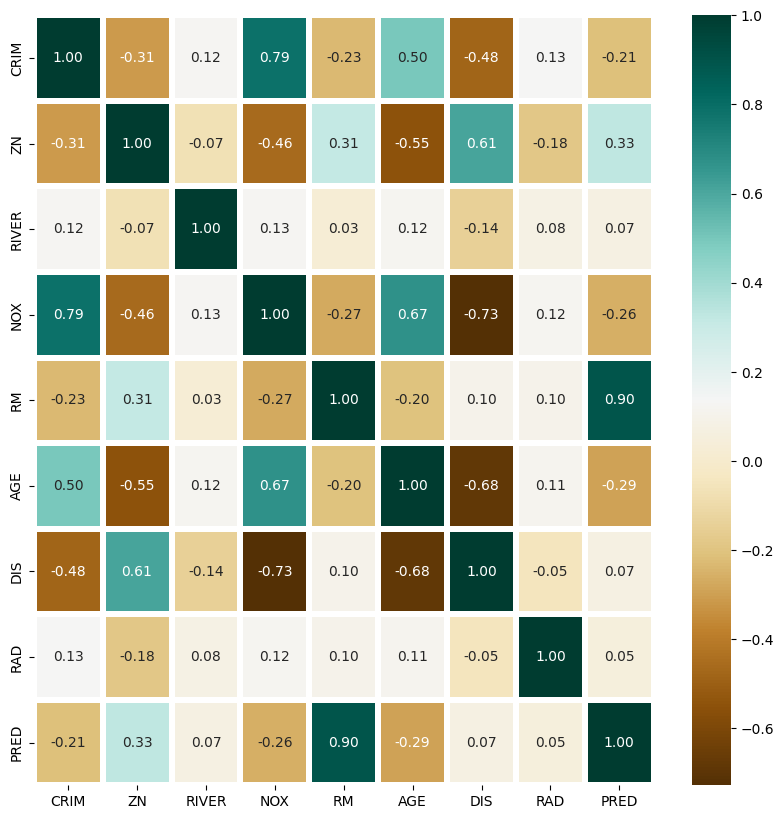

In [ ]:
plt.figure(figsize = (10,10))

sns.heatmap(df.corr(),cmap = 'BrBG',fmt = '.2f',linewidths = 3,annot = True)

plt.show()

In [ ]:
df.drop (['LSTAT','PTRATIO','TAX','INDUS'] , axis = 1,inplace = True)

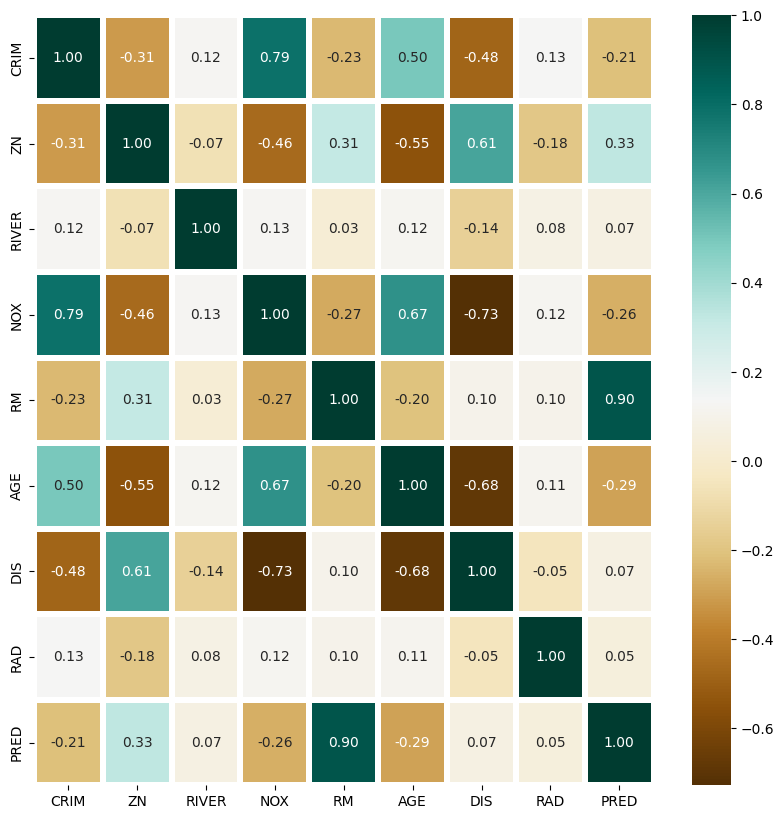

In [ ]:
plt.figure(figsize = (10,10))

sns.heatmap(df.corr(),cmap = 'BrBG',fmt = '.2f',linewidths = 3,annot = True)

plt.show()

In [ ]:
dfinal = df

X = dfinal.drop(columns = ['PRED'] , axis = 1)
Y = dfinal['PRED']

#dfinal['PRED']
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST = train_test_split( X , Y , train_size = 0.8 ,test_size = 0.2,random_state = 16)

In [ ]:
model = LinearRegression()

model.fit(X_TRAIN,Y_TRAIN)

LinearRegression()

In [ ]:
y_predict = model.predict(X_TEST)

In [ ]:
print( mean_absolute_percentage_error(Y_TEST , y_predict) )

0.1224200237042935


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
m = mean_squared_error(Y_TEST, y_predict)
r = r2_score(Y_TEST , y_predict)
print(r,'\n',m)

0.8514990175576459 
 14.246961735837129
